In [35]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
data = pd.read_csv('machine.data.csv', header=None)
data.columns = ['Vendor', 'Model','Machine cycle time', 'Minimum main memory', 'Maximum main memory ', 'Cache memory ', 'Minimum channels', 'Maximum channels', 'Published relative performance ', 'Estimated relative performance']

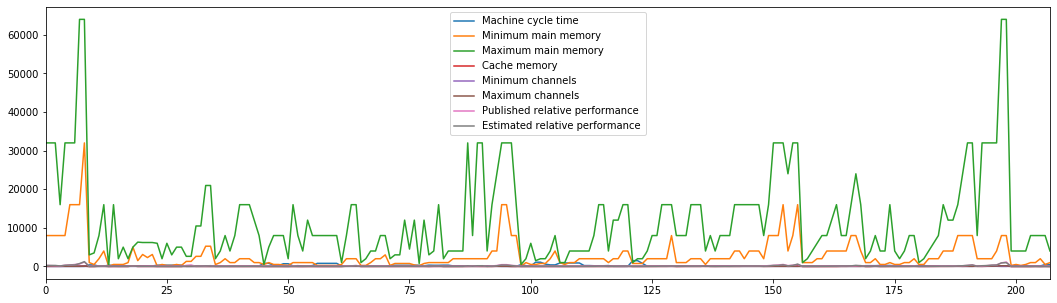

In [37]:
data.plot(figsize=(18, 5))

In [38]:
data.isnull().values.any()

False

In [39]:
data.head()

,Vendor,Model,Machine cycle time,Minimum main memory,Maximum main memory,Cache memory,Minimum channels,Maximum channels,Published relative performance,Estimated relative performance
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B8CFC3B48>,
      dtype=object)

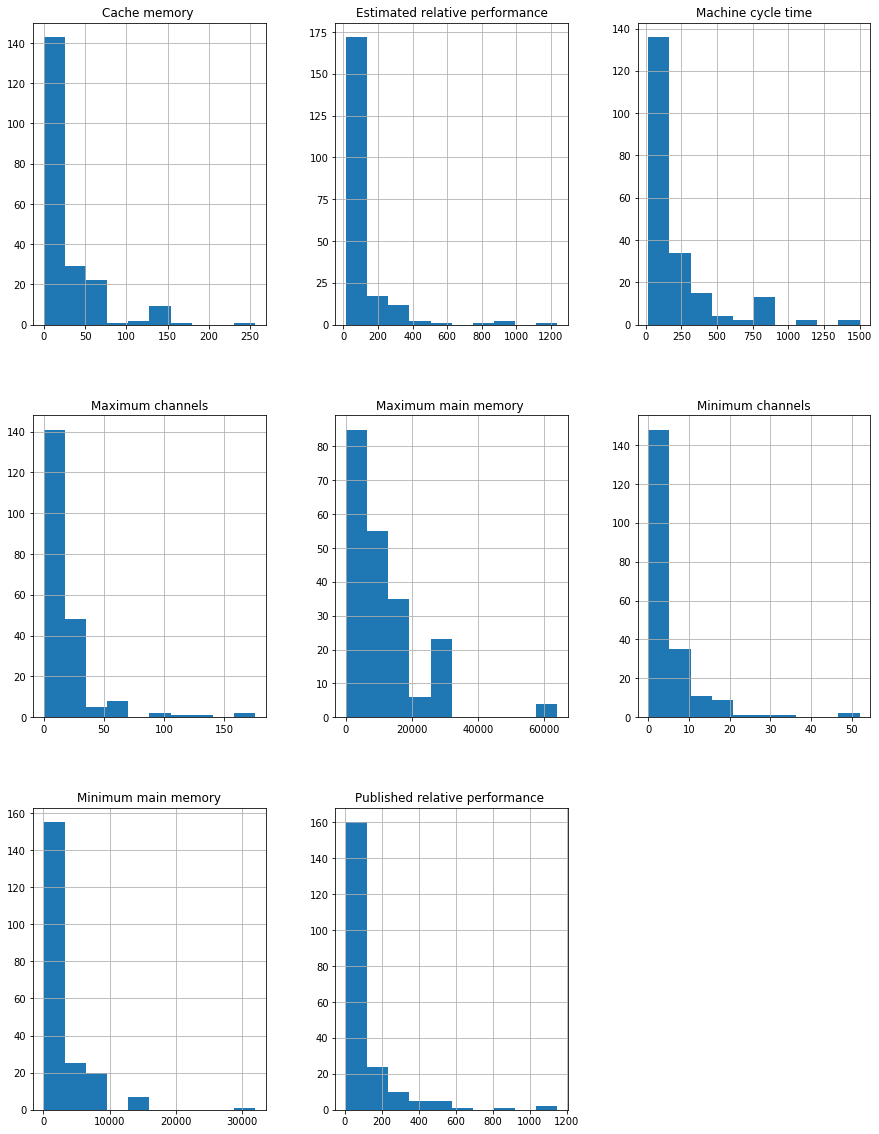

In [40]:

data.hist(figsize = (15,20))

In [41]:
ibm = data[data['Vendor'] == 'ibm']
XY = ibm[['Minimum main memory', 'Estimated relative performance']]
X = ibm['Minimum main memory']
Y = ibm['Estimated relative performance']
X.count() == Y.count() 
print("Numarul de observatii este ")
n = X.count()
print(n) 
print("Incepand cu ")
print(X.iloc[0]) 
print("pana in")
print(X.iloc[n-1])

Numarul de observatii este 
32
Incepand cu 
4000
pana in
768


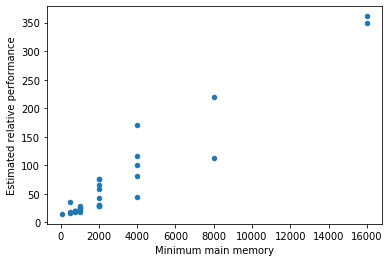

In [42]:
XY.plot.scatter(y = 'Estimated relative performance', x = 'Minimum main memory')

In [43]:
XY.corr()

,Minimum main memory,Estimated relative performance
Minimum main memory,1.000000,0.959497
Estimated relative performance,0.959497,1.000000


In [44]:
scores = []
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

In [45]:
model = LinearRegression()

In [46]:
X = ibm.as_matrix(['Estimated relative performance'])
Y = ibm.as_matrix(['Minimum main memory'])

c:\users\dell\envs\laborator2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\dell\envs\laborator2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [53]:
EstimatedRelativePerformance_model = model.fit(X,Y)
EstimatedRelativePerformance_model.predict(np.array([[400]]))

array([[16946.50227882]])

In [54]:
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, Y)):
     scores.append(model.score(X, Y))
print(scores)

[0.9206339049108964, 0.9206339049108964, 0.9206339049108964]


în lucrarea de laborator 3 am studiat conceptul de regresie liniară. Utilizând Scikit-Learn am divizat datele în 2 seturi, unul pentru antrenare și unul pentru testare, am antrenat algoritmul și am făcut niște preziceri. 